#### <b>Problem 8. 커스텀 데이터셋 분류해 보기</b>

* 자신만의 커스텀 데이터셋을 준비하여 분류(classification) 모델을 학습해 봅시다.
* 아래쪽 코드는 완전히 자유롭게 작성하시면 됩니다.

--------

##### <b>Data Set: Rice leaf Image </b>
- https://www.kaggle.com/datasets/shayanriyaz/riceleafs
- Data loaded by Kaggel API token 

##### <b> Classification target</b>

- Classify disease rice leaf

##### <b> Data Description</b>
- Composition 
  - The dataset has been divided into two groups, **train** and **validation**.
  - Inside the two folders are **4 categories of types**:
    - BrownSpot (418,105)
    - Healthy (1191, 297)
    - Hispa (452, 113)
    - LeafBlast (623, 156)
  - Image size: **not uniform**.



In [ ]:
import shutil
# shutil.rmtree('/content/RiceLeafs')
# shutil.rmtree('/content/riceleaf')
shutil.rmtree('/content/riceleafs')


##### **필요 라이브러리 로드 & 함수 정의** 




In [1]:
# 필요한 패키지 로드
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.metrics import accuracy_score

##### **캐글에서 데이터셋 불러오기 (Kaggle API token 이용)**




In [ ]:
# 캐글에서 데이터셋 불러오기 (Kaggle API token 이용)
# !pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jearthkim","key":"b87aaeed64ad9ff4ce7c33a7e5947710"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shayanriyaz/riceleafs

100% 14.9G/14.9G [03:18<00:00, 106MB/s]
100% 14.9G/14.9G [03:18<00:00, 80.3MB/s]


In [ ]:
!ls

kaggle.json  riceleafs.zip  sample_data


In [ ]:
!unzip riceleafs.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144628.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144631.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144637.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144641.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144645.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144647.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144651.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144654.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144656.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144658.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144730.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144733.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144738.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144742.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144810.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_1

In [ ]:
!rm riceleafs.zip

##### **데이터 확인 및 전처리**


레이블 확인 & 각 레이블 별 샘플의 수 확인 

In [2]:
import os
trn_path= os.listdir('RiceLeafs/train')
val_path= os.listdir('RiceLeafs/validation')

labels= list(trn_path)
print(labels)

train_count= pd.DataFrame(np.zeros(4),index= labels)
test_count= pd.DataFrame(np.zeros(4), index= labels)

for label in labels:
  print(label)
  train_count.loc[label] = len(os.listdir('RiceLeafs/train/%s'%label))
  test_count.loc[label] = len(os.listdir('RiceLeafs/validation/%s'%label))


['BrownSpot', 'Hispa', 'LeafBlast', 'Healthy']
BrownSpot
Hispa
LeafBlast
Healthy


In [ ]:
print(train_count)
print(test_count)

                0
Hispa       452.0
BrownSpot   418.0
Healthy    1191.0
LeafBlast   623.0
               0
Hispa      113.0
BrownSpot  105.0
Healthy    297.0
LeafBlast  156.0


따로 이미지 파일 명 리스트가 있지 않으므로! 

각 디렉토리의 이미지 파일 로드하기 

In [3]:
from fastai.vision.all import *


Healthy= get_image_files(f'RiceLeafs/train/{trn_path[0]}')
Hispa=   get_image_files(f'RiceLeafs/train/{trn_path[1]}')
BrownSpot=     get_image_files(f'RiceLeafs/train/{trn_path[2]}')
LeafBlast= get_image_files(f'RiceLeafs/train/{trn_path[3]}')
print(Healthy[0])
print(Hispa[0])
print(BrownSpot[0])
print(LeafBlast[0])

RiceLeafs/train/BrownSpot/IMG_20190420_194433.jpg
RiceLeafs/train/Hispa/IMG_20190419_171124.jpg
RiceLeafs/train/LeafBlast/IMG_20190419_104006.jpg
RiceLeafs/train/Healthy/IMG_20190419_144424.jpg


이미지 확인 

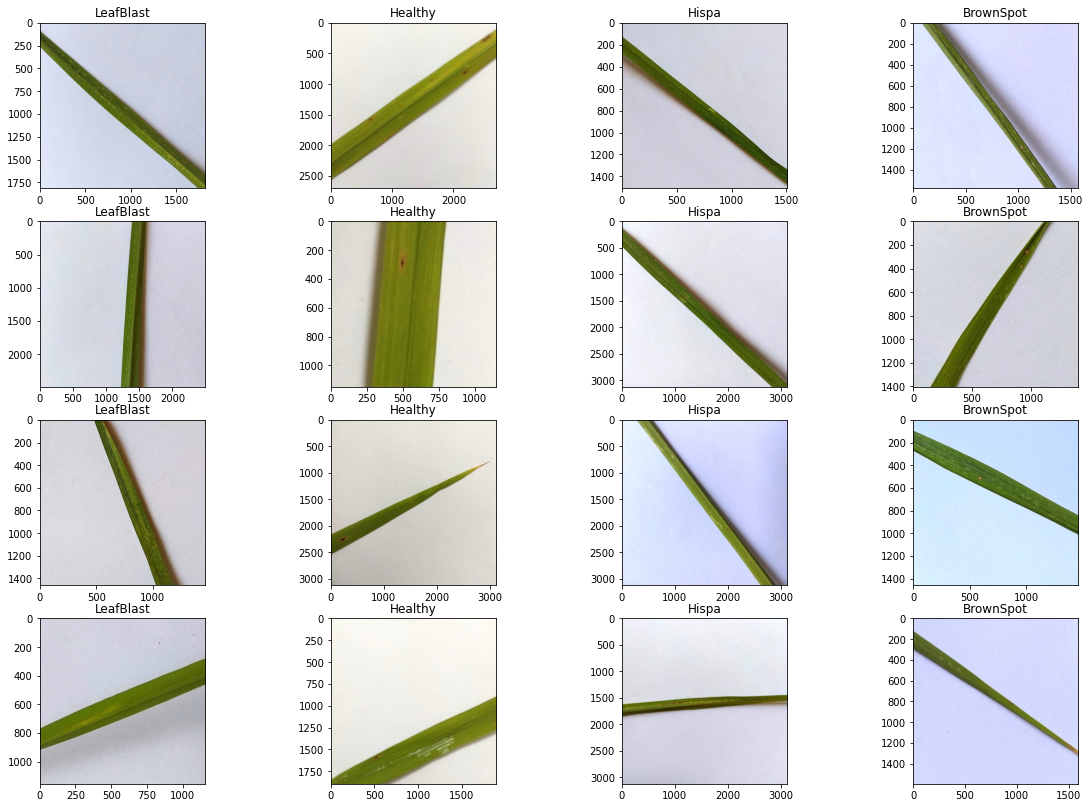

In [ ]:
fig = plt.figure(figsize=(20, 14))


for i in range(0, 4):
  ax = fig.add_subplot(4,4,i*4+1)
  img = PILImage.create(LeafBlast[i])

  # print(img.shape)
  plt.imshow(img)
  ax.set_title('LeafBlast')


  ax = fig.add_subplot(4,4,i*4+2)
  img = PILImage.create(Healthy[i])
  # print(img.shape)
  plt.imshow(img)
  ax.set_title('Healthy')

  ax = fig.add_subplot(4,4,i*4+3)
  img = PILImage.create(Hispa[i])

  # print(img.shape)
  plt.imshow(img)
  ax.set_title('Hispa')

  ax = fig.add_subplot(4,4,i*4+4)
  img = PILImage.create(BrownSpot[i])

  # print(img.shape)
  plt.imshow(img)
  ax.set_title('BrownSpot')

#### **Pre-processing for ML**
- Resizing the images for non-uniform -> uniform resolution (64*64*3) 
- Vectorization 
  - X train set size: (use 1,600 sets of 2,684, 256\*256\*3)
  - X test set size: (use 400 sets of 671, 256\*256\*3)


In [4]:
#@title  
def img_Contrast(img):
    # -----Converting image to LAB Color model-----------------------------------
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # -----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)

    # -----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # -----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl, a, b))

    # -----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return final

In [ ]:
# print(sum(test_count[0]))
print(sum(train_count[0]))
train_count

2684.0


,0
Healthy,1191.0
BrownSpot,418.0
Hispa,452.0
LeafBlast,623.0


In [5]:
import cv2

In [6]:
# train sets (1,600)
X_trn=[]
X_trnContrast=[]

y_trn=[]
for label, count in train_count.iterrows():
  i=0
  while i < 400: # 4 solve RAM killed issue -->  down sampling 
    img_path= get_image_files(f'RiceLeafs/train/{label}')[i]
    img= cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)
    img_resize= cv2.resize(img,(256,256))
    
    fix_img = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    fix_imgContrast= cv2.cvtColor(img_Contrast(fix_img), cv2.COLOR_BGR2RGB)

    X_trn.append(fix_img) 
    X_trnContrast.append(fix_imgContrast)
    y_trn.append(label)
    
    i += 1


In [7]:
X_trn= np.array(X_trn)
X_trnContrast= np.array(X_trnContrast)

y_trn= np.array(y_trn)

print(X_trn.shape, X_trnContrast.shape)
print(y_trn.shape)

X_trn_rs= X_trn.reshape(len(y_trn), 256*256*3)
X_trnContrast_rs= X_trnContrast.reshape(len(y_trn), 256*256*3)
print(X_trn_rs.shape)


(1600, 256, 256, 3) (1600, 256, 256, 3)
(1600,)
(1600, 196608)


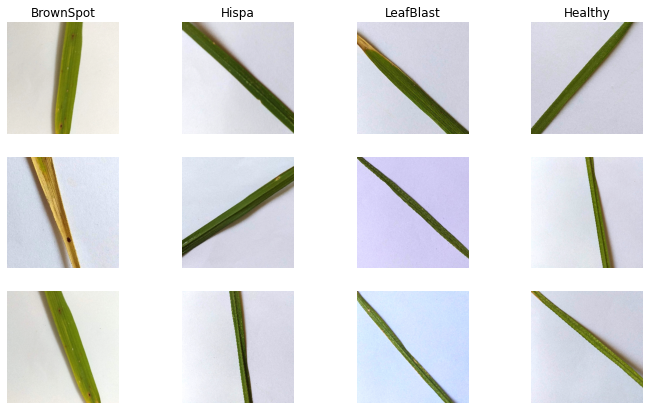

In [8]:
import random
def visualize_data(Xdataset, Ydataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(Ydataset == cls) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            
            plt.imshow(Xdataset[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

plt.figure(figsize=(12,7))
visualize_data(X_trn, y_trn, labels, 3)

In [9]:
# test sets (400)
X_tst=[]

y_tst=[]
for label, count in train_count.iterrows():
  i=0
  while i < 100: # 4 solve RAM killed issue -->  down sampling 
    img_path= get_image_files(f'RiceLeafs/validation/{label}')[i]
    img= cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)
    img_resize= cv2.resize(img,(256,256))

    fix_img = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    
    X_tst.append(fix_img)
    y_tst.append(label)
    
    i += 1


X_tst= np.array(X_tst)
y_tst= np.array(y_tst)

print(X_trn.shape)
print(y_trn.shape)

X_tst_rs= X_tst.reshape(len(y_tst), 256*256*3)
print(X_tst_rs.shape)


(1600, 256, 256, 3)
(1600,)
(400, 196608)


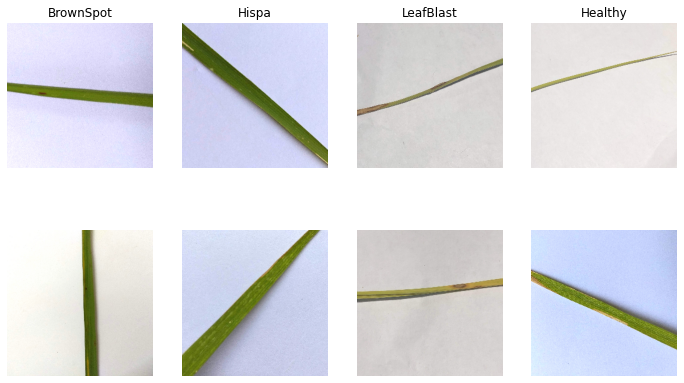

In [ ]:
plt.figure(figsize=(12,7))
visualize_data(X_tst, y_tst, labels, 2)

In [10]:
# train set shuffle 
X_trn= X_trn_rs
X_tst= X_tst_rs

from sklearn.utils import shuffle
X_trn_, y_trn_ = shuffle(X_trn, y_trn)

### **Train**

In [11]:
X_trn, y_trn= X_trn_, y_trn_

In [12]:
from sklearn.linear_model import LogisticRegression
import time

In [ ]:
def optimal_iter(maxIter,X_train,y_train,X_test,y_test):
  performance_test= pd.DataFrame(columns=['max_iter','Acc_test','run_time'])
  for iter in maxIter:
      start_time = time.time() # 시작 시간

      model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      val_acc = accuracy_score(y_test, y_pred)
      performance_test= performance_test.append({"max_iter": iter, 
                                                "Acc_test": val_acc,
                                                "run_time":time.time() - start_time}, ignore_index= True)
      print(f'{iter} done')
  bestP=performance_test[performance_test.Acc_test == max(performance_test.Acc_test)]
  print("results: \n")
  print(performance_test)
  print( '===========================================')
  print("The best hyperparameter :: ")
  print(bestP)

In [ ]:
maxIter= [20, 50,100,200] #range(5,100,10)
optimal_iter(maxIter, X_trn, y_trn, X_tst, y_tst)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


results: 

   max_iter  Acc_test    run_time
0      20.0    0.0925   54.416394
1      50.0    0.1625  113.260583
2     100.0    0.2150  211.957600
3     200.0    0.2125  407.698756
The best hyperparameter :: 
   max_iter  Acc_test  run_time
2     100.0     0.215  211.9576


??

In [13]:
# Train with optimized parameter
start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100, verbose= True)
model.fit(X_trn, y_trn)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

y_pred = model.predict(X_trn)
train_acc = accuracy_score(y_trn, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_tst)
val_acc = accuracy_score(y_tst, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min finished


소요된 시간(초 단위): 211.5075876712799
학습 데이터셋 정확도: 0.755
검증 데이터셋 정확도: 0.205
클래스: ['BrownSpot' 'Healthy' 'Hispa' 'LeafBlast']
반복 횟수: [100]
학습된 가중치 크기: (4, 196608)


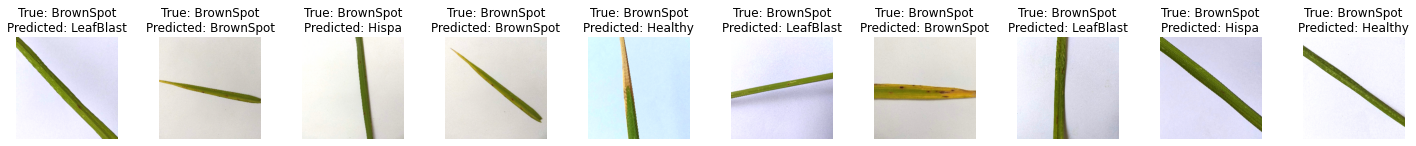

In [ ]:
max_cnt = 10

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(20, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_tst[:max_cnt], y_tst[:max_cnt], model.predict(X_tst[:max_cnt])):
    ax.imshow(np.reshape(image, (256,256,3))) 
    ax.axis('off')
    ax.set_title(f'True: {label}\nPredicted: {pred}')

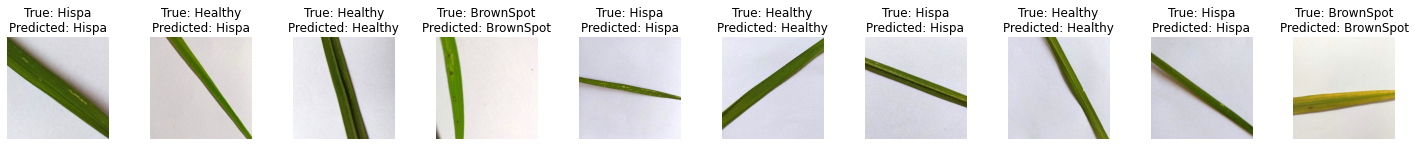

In [ ]:
max_cnt = 10

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(20, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_trn[:max_cnt], y_trn[:max_cnt], model.predict(X_trn[:max_cnt])):
    ax.imshow(np.reshape(image, (256,256,3))) 
    ax.axis('off')
    ax.set_title(f'True: {label}\nPredicted: {pred}')

### **For more performace** : Augmentation

-> 상당한 과적합이 일어났기 때문에 augmentation 해 준다. 


이미지 특성상 여백이 많으므로 상하반전, 이동보다는 
색반전과 대비 증가 해주면 괜찮을 것 같다.  

In [13]:
X_trnInv= 255-X_trn
imgX_trnInv= X_trnInv.reshape((list(y_trn.shape)[0],256,256,3))

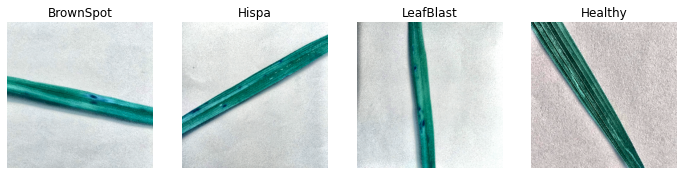

In [ ]:
plt.figure(figsize=(12,7))
visualize_data(X_trnContrast, y_trn, labels, 1)

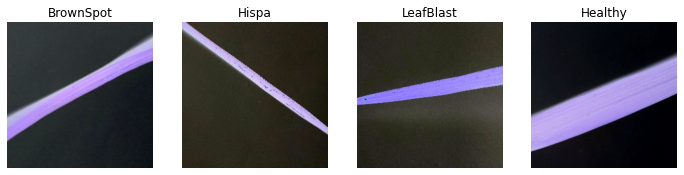

In [ ]:
plt.figure(figsize=(12,7))
visualize_data(imgX_trnInv, y_trn, labels, 1)

In [14]:
# augmented image data append to original data 
X_trn_augmented = [image for image in X_trn]
X_trn_augmentedCT= [image for image in X_trnContrast_rs]
# X_trn_augmentedInv = [image for image in X_trnInv]

i=0
y_trn_augmented=[]
while i < 2:
  print(i)
  y_trn_augmented =np.concatenate((y_trn_augmented, [label for label in y_trn]))
  i += 1

X_trn_augmented= np.asarray(X_trn_augmented)
X_trn_augmentedCT= np.asarray(X_trn_augmentedCT)
# X_trn_augmentedInv= np.asarray(X_trn_augmentedInv)

X_trn_augmented= np.concatenate((X_trn_augmented, X_trn_augmentedCT))
# X_trn_augmented= np.concatenate((X_trn_augmented, X_trn_augmentedCT, X_trn_augmentedInv))

y_trn_augmented= np.asarray(y_trn_augmented)


print(X_trn_augmented.shape, y_trn_augmented.shape)

0
1
(3200, 196608) (3200,)


In [15]:
# 증진된 데이터들을 섞기(shuffle)
X_train_augmented, y_train_augmented = shuffle(X_trn_augmented, y_trn_augmented)

In [16]:
print(X_train_augmented.shape, y_train_augmented.shape)

(3200, 196608) (3200,)


In [ ]:
maxIter= [100,200,300]
optimal_iter(maxIter, X_train_augmented, y_train_augmented, X_tst, y_tst)

In [16]:
model_augmented = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=100)
model_augmented.fit(X_train_augmented, y_train_augmented)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

In [17]:
import gc
collected = gc.collect()
print(collected)
print(gc.get_count())

263
(72, 0, 0)


In [18]:
y_pred_augmented = model_augmented.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred_augmented)
print('학습 데이터셋 정확도:', train_acc)


학습 데이터셋 정확도: 0.5734375


In [19]:
y_pred = model_augmented.predict(X_tst)
val_acc = accuracy_score(y_tst, y_pred)
print('검증 데이터셋 정확도:', val_acc)

검증 데이터셋 정확도: 0.22


아직도 과적합이긴 하지만 그래도 줄었다.

test set accuracy가 조악하지만 머신러닝으로 잘 나올만한 데이터는 아니었던 것 같다. 


### 성능평가

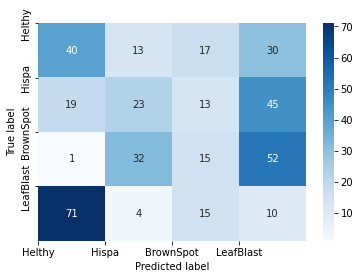

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_tst, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.xticks(np.arange(0,4), ['Helthy','Hispa','BrownSpot','LeafBlast'])
plt.yticks(np.arange(0,4), ['Helthy','Hispa','BrownSpot','LeafBlast'])
plt.show()

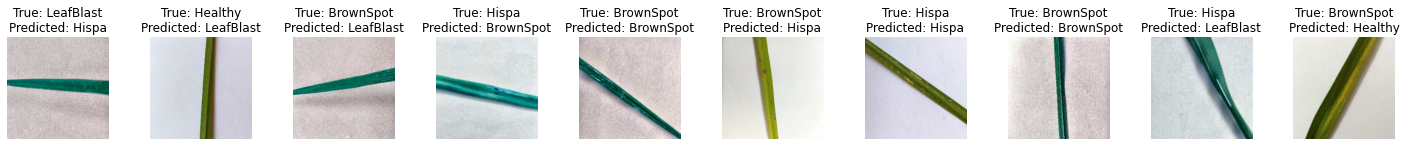

In [21]:
max_cnt = 10
rdn= 50

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(20, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_train_augmented[rdn:rdn+max_cnt], y_train_augmented[rdn:rdn+max_cnt], model_augmented.predict(X_trn[rdn:rdn+max_cnt])):
    ax.imshow(np.reshape(image, (256,256,3))) 
    ax.axis('off')
    ax.set_title(f'True: {label}\nPredicted: {pred}')